# Project: Soccer dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


## Project: Soccer database project
 This project contains data for soccer matches, players and teams from different European Countries.It is named "Soccer database project".It consists of different columns  which are :

country_id: country name (Type: Categorical)

league id: league name (Type: Categorical)

season: the year of this match (Type: Categorical)

stage: Match order (Type: Numerical)

date: the date of this match (Type: Categorical)

match_api_id: API identifier for the match (Type: Numerical)

home_team_api_id: the home team name (Type: Categorical)	

away_team_api_id: the away team name (Type: Categorical)

home_team_goal: no of goals scored by the home team (Type: Numerical)

away_team_goal: no of goals scored by the away team (Type: Numerical)

, and many other columns.

We will try to find an answer for 2 questions:

#### (1) What is the team which won the most matches?

#### (2) Does there any relationship between the home stadium and the winning chance of the home team?

In [1]:
# Import statements
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading our data set
match = pd.read_csv('Database_Soccer/Match.csv')
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,KRC Genk,Beerschot AC,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,KAA Gent,RAEC Mons,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,FCV Dender EH,Standard de Liège,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check for the shape of our dataset
match.shape

(25979, 85)

In [4]:
# Understand basic statistics of numerical data
match.describe()

,id,stage,match_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,24158.000000,24158.000000,24147.000000,24147.000000,24147.000000,...,24701.000000,24686.000000,24658.000000,24644.000000,24666.000000,24744.000000,24638.000000,24651.000000,24538.000000,24425.000000
mean,12990.000000,18.242773,1.195429e+06,1.544594,1.160938,0.999586,2.073516,4.061001,6.049199,7.544871,...,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.876970
std,7499.635658,10.407354,4.946279e+05,1.297158,1.142110,0.022284,0.387185,0.385973,0.446024,1.609682,...,113758.447918,101438.583414,103845.905029,112450.715516,110861.276758,107359.030969,116358.092456,116492.957656,112397.540326,110237.525957
min,1.000000,1.000000,4.831290e+05,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,...,2790.000000,2752.000000,2752.000000,2790.000000,2625.000000,2625.000000,2625.000000,2625.000000,2770.000000,2802.000000
25%,6495.500000,9.000000,7.684365e+05,1.000000,0.000000,1.000000,2.000000,4.000000,6.000000,8.000000,...,32579.000000,30464.000000,30627.000000,33453.500000,31037.000000,30920.000000,32863.000000,33435.000000,32627.000000,32747.000000
50%,12990.000000,18.000000,1.147511e+06,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,8.000000,...,42388.000000,39892.000000,41083.000000,46212.000000,41634.500000,41433.000000,45816.000000,45860.000000,45358.000000,42652.000000
75%,19484.500000,27.000000,1.709852e+06,2.000000,2.000000,1.000000,2.000000,4.000000,6.000000,8.000000,...,159882.000000,121080.000000,145561.000000,160844.000000,151079.000000,144996.000000,163611.750000,164209.000000,161291.000000,161660.000000
max,25979.000000,38.000000,2.216672e+06,10.000000,9.000000,2.000000,8.000000,8.000000,8.000000,9.000000,...,748432.000000,705484.000000,728414.000000,746419.000000,722766.000000,750435.000000,717248.000000,722766.000000,722766.000000,726956.000000


In [5]:
# Identify data types and presence of missing values in each column.
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 85 columns):
id                  25979 non-null int64
country_id          25979 non-null object
league_id           25979 non-null object
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null object
away_team_api_id    25979 non-null object
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
home_player_X1      24158 non-null float64
home_player_X2      24158 non-null float64
home_player_X3      24147 non-null float64
home_player_X4      24147 non-null float64
home_player_X5      24147 non-null float64
home_player_X6      24147 non-null float64
home_player_X7      24147 non-null float64
home_player_X8      24147 non-null float64
home_player_X9      24147 non-null float64
home_player_X10     24147 non-null float64
home

In [6]:
# Check for missing values in each column
match.isna().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
home_player_1        1224
home_player_2        1315
home_player_3        1281
home_player_4        1323
home_player_5        1316
home_player_6        1325
home_player_7        1227
home_player_

In [7]:
# Check for duplicates
match.duplicated().sum()

0

In the cell above, we have found that there are missing values in all of the columns after (away_team_goal) column so we need to clean them!


### Data Cleaning

In [8]:
# Check for the columns of the dataset
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [9]:
# We can drop the unneeded columns
match.drop(match.columns[11:77] ,axis = 1,inplace = True)
match.drop(['foulcommit','card','corner','cross','goal', 'shoton','shotoff','possession'],axis = 1 , inplace = True)
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal'],
      dtype='object')

In [10]:
# identify data types and presence of missing values in each column after cleaning.
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null object
league_id           25979 non-null object
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null object
away_team_api_id    25979 non-null object
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(5), object(6)
memory usage: 2.2+ MB


After cleaning, we have dropped some unneeded columns:

'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_3',
       'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
       'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
       'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
       'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
       'away_player_9', 'away_player_10', 'away_player_11', 'goal', 'shoton',
       'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'


## Data Wrangling for Soccer Match Data:


  This document outlines the data cleaning steps performed on a soccer match dataset (Match.csv). The data is assumed to be loaded into a pandas dataframe named match.


### 1. Initial Inspection

  Used pandas.describe to understand basic statistics of numerical data (e.g., mean, standard deviation, minimum, maximum).
Used .info to identify data types and presence of missing values in each column.
Observed missing values present in columns beyond away_team_goal.


### 2. Data Cleaning

  Column Selection: Dropped unnecessary columns containing player information (home_player_X1 to away_player_11) and some event-related data (foulcommit, card, etc.) using .drop.


### 3. Final Dataframe

   The data cleaning process resulted in a dataframe match containing the following columns:
id: Unique identifier for each match
country_id: Country where the match took place
league_id: League where the match took place
season: Season when the match took place
stage: Stage of the competition (e.g., group stage, knockout stage)
date: Date of the match
match_api_id: Unique identifier for the match provided by an API
home_team_api_id: Unique identifier for the home team provided by an API
away_team_api_id: Unique identifier for the away team provided by an API
home_team_goal: Number of goals scored by the home team
away_team_goal: Number of goals scored by the away team



<a id='eda'></a>
## Exploratory Data Analysis


### (1) What is the team which won the most matches?

   In the cell below, we will add a column to my dataset which is named 'winner' which will give us the name of the team that has won in every match and if the result is 'draw' then it will return 'none' and this will be modified later in this code to 'draw'. After adding 'winner' column, we can know now what is the team which won the most matches in this dataset and this is the answer of the  question we have stated for the analysis of this dataset.
   
   
   Next, we will create a barchart which describe our result and give us an Information about the distribution of wins among teams.
   

In [11]:
# Add a new column named 'winner'.
def add_winner_column(df):
  """Adds a 'winner' column to a DataFrame based on goal difference.

  Args:
      df (pandas.DataFrame): The DataFrame to add the 'winner' column to.

  Returns:
      pandas.DataFrame: The DataFrame with the new 'winner' column.
  """

  # Add a 'winner' column based on home and away team goals
  df['winner'] = np.where(df['home_team_goal'] > df['away_team_goal'],
                          df['home_team_api_id'],
                          np.where(df['away_team_goal'] > df['home_team_goal'],
                                   df['away_team_api_id'], None))
  # lookup the team names based on the winner ID in a separate step
  # (outside this function)

  return df

# Add the 'winner' column (call the function)
match = add_winner_column(match.copy())  # Avoid modifying the original DataFrame

# Print the DataFrame with the new 'winner' column
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner
0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,KRC Genk,Beerschot AC,1,1,None
1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,None
2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,RSC Anderlecht
3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,KAA Gent,RAEC Mons,5,0,KAA Gent
4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,FCV Dender EH,Standard de Liège,1,3,Standard de Liège


In [12]:
# Checking for the columns of a dataset after adding a new column
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'winner'],
      dtype='object')

In [13]:
wins = match['winner'].value_counts()

# Find the team with the most wins 
# Answer of the fist question
most_wins_team = wins.idxmax()
most_wins_count = wins.max()

# Print the result
print(f"The team with the most wins is '{most_wins_team}' with {most_wins_count} wins.")

The team with the most wins is 'FC Barcelona' with 234 wins.


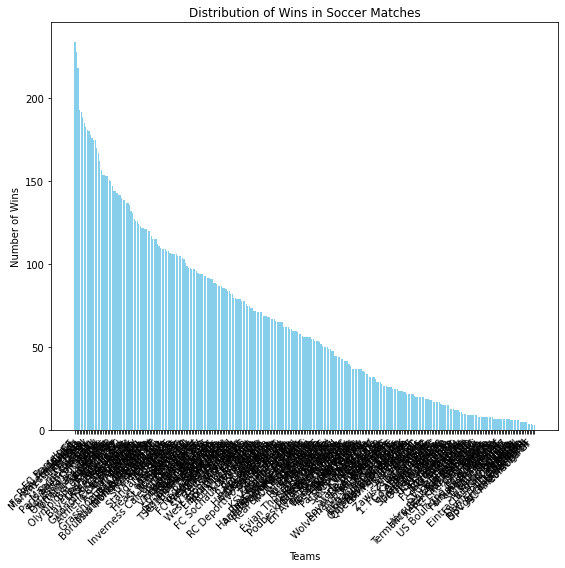

In [14]:
# Create a bar chart for distribution of wins
plt.figure(figsize=(8, 8))  # Set the figure size
bars = plt.bar(wins.index, wins.values, color='skyblue')  # Create bars

# Add labels and title
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.title("Distribution of Wins in Soccer Matches")

# Rotate x-axis labels for readability if there are many teams
if len(wins.index) > 10:
  plt.xticks(rotation=45, ha='right')

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

plt.show()

  This bar chart give us an information about the distribution of wins among the teams in this dataset.
  
  #### On the highest point,
      we have the distribution of wins of 'FC Barcelona' with 234 wins. 
  #### on the lowest point, 
      we have the distribution of wins of 'AC Arles-Avignon' with only 3 wins.

In [15]:
# Handling missing values in the 'winner' column
match['winner'] = match['winner'].fillna('Draw') 
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner
0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,KRC Genk,Beerschot AC,1,1,Draw
1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,Draw
2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,RSC Anderlecht
3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,KAA Gent,RAEC Mons,5,0,KAA Gent
4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,FCV Dender EH,Standard de Liège,1,3,Standard de Liège


### (2) Does there any relationship between the home stadium and the winning chance of the home team?

#### The cells below analyzes soccer match data to explore home team advantage. Here's a breakdown:

  ##### Step 1: Assigning Win Category

    It defines a value (e.g., 2) to represent draws.
    
    It creates a function assign_win_category that takes a match record as input.
    
    The function checks the winner and assigns a win category (1: home team win, 0: home team loss, 2: draw) based on the     winner and home team information.
    
    
  ##### Step 2: Adding New Columns

    It adds a new column named 'win_category' to the DataFrame using the assign_win_category function.
    
    It checks the structure of the DataFrame (match.columns) to see the newly added column.
    
    
  ##### Step 3: Visualizing Home Team Advantage

    It filters the data for matches where both teams scored.
    
    It creates a scatter plot to see how the number of goals scored by the home team compares to the number of goals scored by    the away team in these matches.
    
    
  ##### Step 4: Analyzing Home Team Wins

    It adds a new column named 'home_team_win' indicating if the home team won (1) or lost (0).
    
    It creates another visualization with color-coding to see how the number of goals scored by the home team relates to whether they won the match (considering all matches, not just those where both teams scored).
    
    
  ##### Step 5: Statistical Analysis

    It calculates the win rates for home and away teams.
    
    It prints the win rates as percentages.

In [16]:
# Assign a value to represent draws (e.g., 2)
draw_value = 2

# Add a new column named 'win_category'
def assign_win_category(match):
  """Assigns a win category (win, loss, or draw) based on the winner and home team information.

  Args:
      match (pandas.Series): A row from the 'match' DataFrame.

  Returns:
      int: The win category (1: win of the home team , 0: loss of the home team, 2: draw).
      or (1: loss of the away team , 0: win of the away team, 2: draw).
  """
  if match['winner'] == match['home_team_api_id']:
    return 1  # Win
  elif match['winner'] != 'Draw':  # Handle cases where winner is not home team or 'Draw'
    return 0  # Loss
  else:
    return draw_value  # Draw

# Add a 'win_category' column based on the winner
match['win_category'] = match.apply(assign_win_category, axis=1)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner,win_category
0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,KRC Genk,Beerschot AC,1,1,Draw,2
1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,Draw,2
2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,RSC Anderlecht,0
3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,KAA Gent,RAEC Mons,5,0,KAA Gent,1
4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,FCV Dender EH,Standard de Liège,1,3,Standard de Liège,0


In [17]:
# Checking for the columns of a dataset after adding a new column
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'winner', 'win_category'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

array([[<AxesSubplot:title={'center':'away_team_goal'}>,
        <AxesSubplot:title={'center':'home_team_goal'}>],
       [<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'match_api_id'}>],
       [<AxesSubplot:title={'center':'stage'}>,
        <AxesSubplot:title={'center':'win_category'}>]], dtype=object)

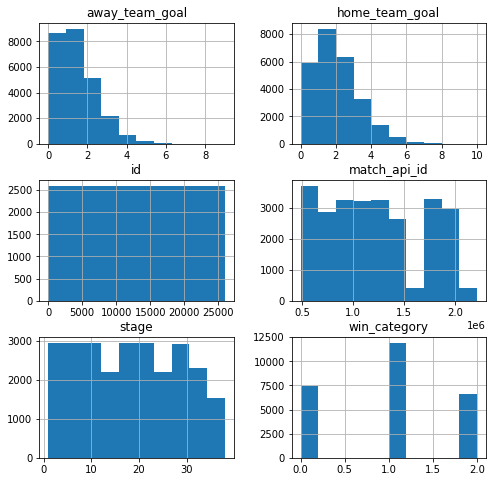

In [18]:
# Visualizing numerical columns
match.hist(figsize=(8, 8))

This can give a relation ship betweem home stadium and winning chance as in the histogram of the ' win_category ' column, we can see thatthe home team wins (category value like 1) are significantly more frequent than away team wins (category value like 0)


#### However, this isn't a conclusive answer. Here's why:

Limited Information: The histogram only shows the frequency of win categories. It doesn't tell you the win rate (percentage of games won by the home team).

Draws Not Isolated: The current histogram combines wins, losses, and draws. Ideally, you'd separate draws into their own category to isolate the win relationship.

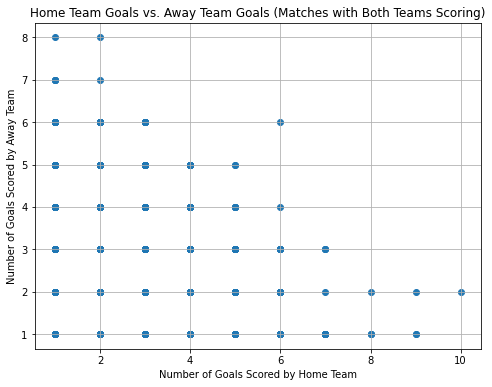

In [19]:
# Create a scatter plot to visualize home team advantage so that we can know the effect of the home stadium
#   on the winning probability.

# Filter for matches where both teams scored (goals > 0)
filtered_matches = match[(match['home_team_goal'] > 0) & (match['away_team_goal'] > 0)]

# Extract number of goals scored for home and away teams
home_goals_scored = filtered_matches["home_team_goal"]
away_goals_scored = filtered_matches["away_team_goal"]

# Scatter plot to visualize home vs away goals (using filtered data)
plt.figure(figsize=(8, 6))
plt.scatter(home_goals_scored, away_goals_scored)

# Label the axes with clear descriptions
plt.xlabel("Number of Goals Scored by Home Team")
plt.ylabel("Number of Goals Scored by Away Team")

# Add a title that reflects the data being shown
plt.title("Home Team Goals vs. Away Team Goals (Matches with Both Teams Scoring)")

# Add a grid to improve readability
plt.grid(True)

# Show the plot
plt.show()


### Home Team Goals vs. Away Team Goals (Matches with Both Teams Scoring)

This scatter plot shows the relationship between the number of goals scored by the home team and the number of goals scored by the away team in matches where both teams scored at least one goal. Each point represents a single match.


#### Observations:

      Spread of Points: The points are scattered throughout the graph, indicating that there's no clear linear relationship   between the number of goals scored by the home team and the away team in these matches.
     
      Home Team Performance: We can see some matches where the home team scored more goals than the away team (points above the diagonal line). There are also instances where the away team outscored the home team (points below the diagonal).
    
      High Scoring Matches: Some data points show high numbers of goals scored by both teams.
    
    
So we can conclude that this visualization hasn't give us a home advantage yet, so we need a further analysis

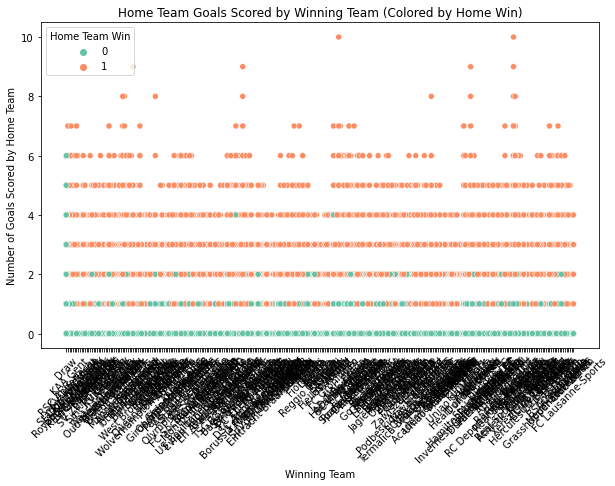

Home Team Win Rate: 45.88%
Away Team Win Rate: 54.12%


In [20]:
match['home_team_win'] = np.where(match['winner'] == match['home_team_api_id'], 1, 0)

# Visualize win rate with color-coding
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='winner', y='home_team_goal', hue='home_team_win', data=match, palette='Set2')

# Label the axes with clear descriptions
plt.xlabel("Winning Team")
plt.ylabel("Number of Goals Scored by Home Team")

# Add a title that reflects the data being shown
plt.title("Home Team Goals Scored by Winning Team (Colored by Home Win)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to explain the color-coding
plt.legend(title="Home Team Win")

plt.show()

# Statistical Analysis: Win Rate Differential

# Calculate win rates for home and away teams
home_win_rate = match[match['home_team_win'] == 1].shape[0] / match.shape[0] * 100
away_win_rate = match[match['home_team_win'] == 0].shape[0] / match.shape[0] * 100

# Print win rates
print(f"Home Team Win Rate: {home_win_rate:.2f}%")
print(f"Away Team Win Rate: {away_win_rate:.2f}%")

### Home Team Goals Scored by Winning Team (Colored by Home Win)

This scatter plot, along with the calculated win rates, helps explore the relationship between a team winning and the number of goals scored by the home team. Here's a breakdown:


##### Color-Coding: 

    The data points are colored based on whether the home team won (blue) or lost (orange). This allows you to see how home team goals are distributed across wins and losses.
    
    Win Rates: The code calculates the win rate for the home team ({home_win_rate:.2f}%) and the away team ({away_win_rate:.2f}%). This provides a quantitative measure of how often the home team wins compared to away teams.
    
#### Observations:

    The scatter plot doesn't show a clear linear relationship between the number of goals scored by the home team and winning. There are wins and losses for the home team across the entire range of goals scored.
    
    However, by considering the win rates, you can see if one win rate is significantly higher than the other. A higher home team win rate ({home_win_rate:.2f}%), compared to the away team win rate ({away_win_rate:.2f}%), would suggest a possible home stadium advantage.
    
    At the end this visualization give us a lower home team win rate ({home_win_rate:.2f}%), compared to the away team win rate ({away_win_rate:.2f}%). So it gives us a result opposite to what we imagined, it doesn't give us a relationship between home stadium and winning chance

In [21]:
# Checking for the columns of a dataset after adding a new column
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'winner', 'win_category',
       'home_team_win'],
      dtype='object')

<a id='conclusions'></a>
## Conclusions


   We have found that 'FC Barcelona' is team who have won the most matches in this soccer dataset with 234 wins, and this obvious in the bar chart of the distribution of wins.
   The scatter plot shows a higher distribution of goals scored by away teams compared to home teams. However, it's important to consider that this might not fully represent home advantage, which is weird, as it is known that the team that plays in its home stadium has a higher chance of winning.
   
   
### Limitations
    
   It's important to note that this data only reflects matches played in the leagues included in this dataset, and may not be representative of all matches played during those seasons. Additionally, the concept of a "winner" is dependent on assigning wins based on goal difference. Draws and other match outcomes are not explicitly categorized.


### Additional approaches

   There are some additional approches that can be done such as:
   
  Exploring Team Performance:

 (1) Win Rate by Season/League: How does win rate vary by season or league? Are there any teams that are consistently strong performers across seasons/leagues?
 
 (2) Goal Differential: Analyze the goal differential (home team goals minus away team goals) for wins, losses, and draws. Is there a significant difference in goal differential between winning and losing teams?
 
 (3)Team Scoring Trends: Explore trends in team scoring over time. Are there teams with consistently high-scoring offenses or strong defenses?


In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analysis_for_Soccer_data_set_project.ipynb'])

0